In [1]:
from qiskit import Aer
from qiskit import QuantumCircuit
from qiskit.algorithms import AmplificationProblem

from qiskit.visualization import plot_histogram, plot_state_qsphere

# Match

### As seguintes condições foram estabelecidas por Ted Mosby para ter um bom encontro:

- 1: Filhos

A pessoas precisa querer ter filhos (a).

- 2: Lugares e Animais

A pessoa precisa gostar de bares ou animais (b | c)

- 3: Love and Rock

A pessoa precisa ser romantica ou gostar de rock (d | e)

Expressão: a & (b | c) & (d | e)

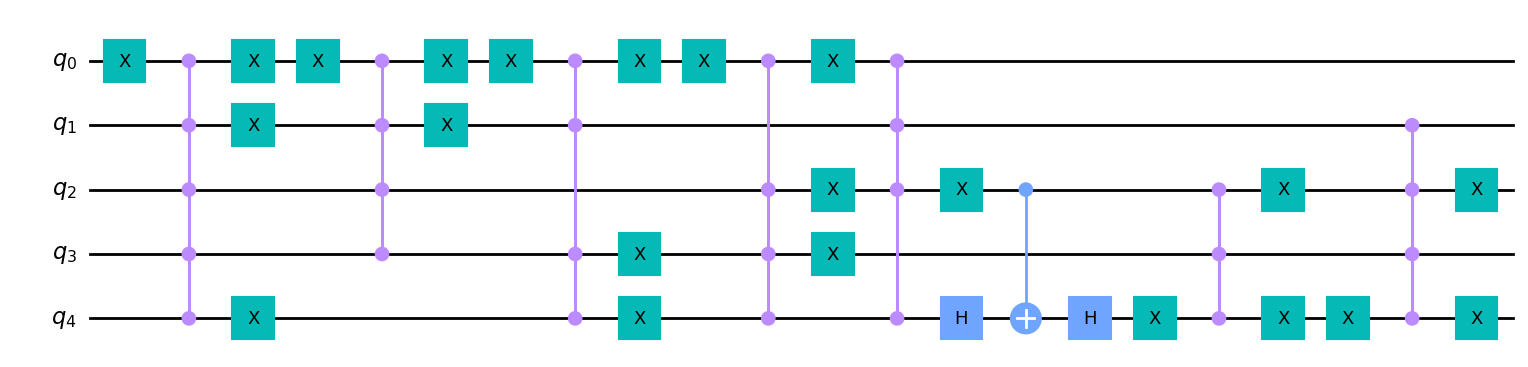

In [2]:
from qiskit.circuit.library.phase_oracle import PhaseOracle
from qiskit.exceptions import MissingOptionalLibraryError
from qiskit.algorithms import Grover
from qiskit.primitives import Sampler


expressao_ted = 'a & (b | c) & (d | e)'

try:
    oracle = PhaseOracle(expressao_ted)
    problem = AmplificationProblem(oracle, is_good_state=oracle.evaluate_bitstring)
    display(problem.grover_operator.oracle.decompose().draw(output='mpl'))
except MissingOptionalLibraryError as ex:
    print(ex)

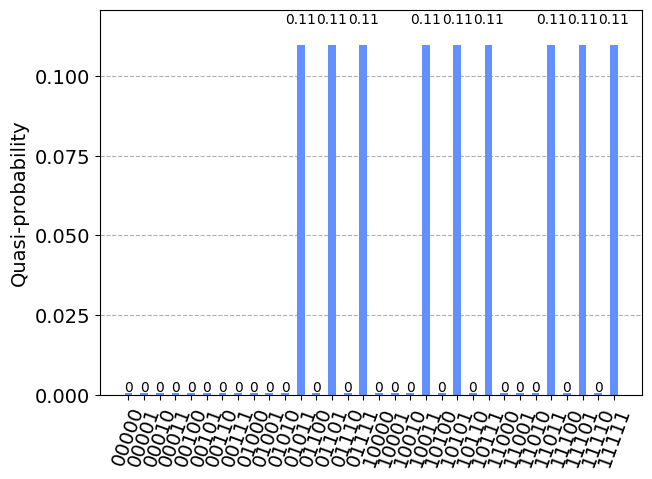

In [3]:
grover = Grover(sampler=Sampler())
result = grover.amplify(problem)
display(plot_histogram(result.circuit_results[0]))

# Date

### Agora que sabemos possivel matchs para Ted Mosby, temos que descobrir qual seria o periodo ideal para Ted ter o primeiro date.

#### A condições impostas foram:

- 1: Clima e Horario.

O mesmo falou que tem preferência por sair em dias mais quentes (26°), verificando percebemos que isso ocorre em Junho, Julho e Agosto (Nova Iorque). (A)

Ele também falou que caso o clima esteja bom ele prefere sair a noite. (B)

(A & B)

- 2: Local

Ele percebeu que seus Dates em bares ou restaurantes tem mais sucesso (C | D)

- 3: Distancia

O local deve estar no maximo 500m de distancia (E).

Expressão: e & (a & b) & (c | d)

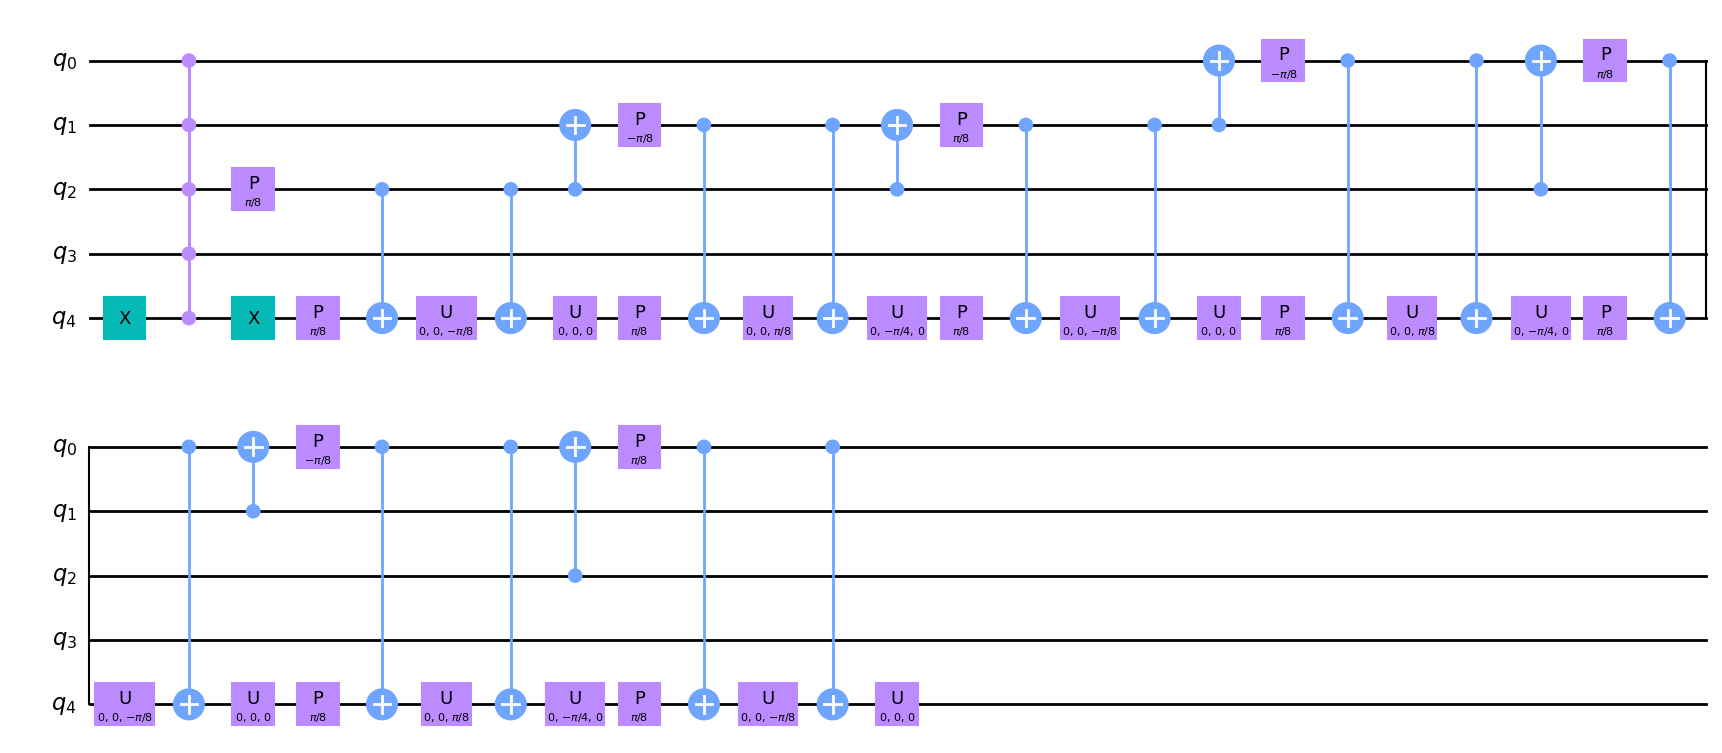

In [4]:
expressao_ted = 'e & (a & b) & (c | d)'

try:
    oracle = PhaseOracle(expressao_ted)
    problem = AmplificationProblem(oracle, is_good_state=oracle.evaluate_bitstring)
    display(problem.grover_operator.oracle.decompose().draw(output='mpl'))
except MissingOptionalLibraryError as ex:
    print(ex)

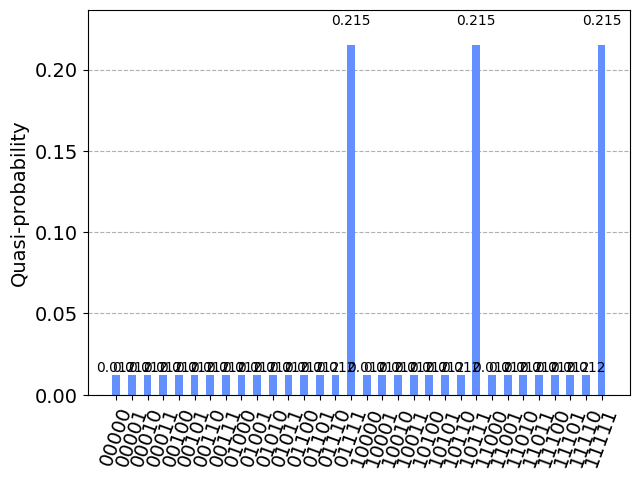

In [5]:
grover = Grover(sampler=Sampler())
result = grover.amplify(problem)
display(plot_histogram(result.circuit_results[0]))

## Observando as relações anteriores do Ted podemos perceber:

- Quando o seu par queria ter filhos e ela era romantica, o relacionamento durava mais de um ano.
- Quando o seu par gostava de animais, de bares e era romantica, seu relacionamento durava de um ano.
- Quando o seu par queria ter filhos e gostava de rock, seu relacionamento durava de um ano.

Expressão: (b & d) | (a & d & c) | (b & e)

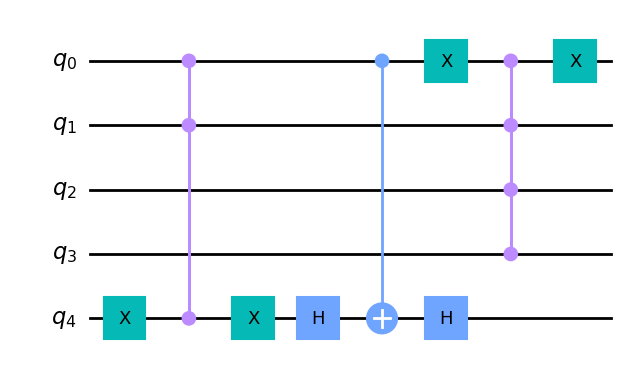

In [6]:
expressao_ted = '(b & d) | (a & d & c) | (b & e)'

try:
    oracle = PhaseOracle(expressao_ted)
    problem = AmplificationProblem(oracle, is_good_state=oracle.evaluate_bitstring)
    display(problem.grover_operator.oracle.decompose().draw(output='mpl'))
except MissingOptionalLibraryError as ex:
    print(ex)

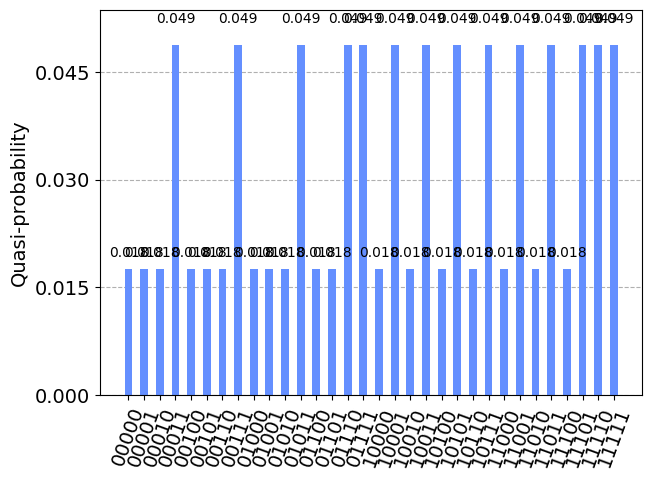

In [7]:
grover = Grover(sampler=Sampler())
result = grover.amplify(problem)
display(plot_histogram(result.circuit_results[0]))

## IBM Quantum

Também podemos rodar esses circuitos em computadores quanticos de verdade. A seguir estamos rodando o ultimo circuto apresentado no computador quantico IBMQ_BELEM, assim podemos validar nosso resultado.

In [8]:
from qiskit_ibm_runtime import QiskitRuntimeService
QiskitRuntimeService.save_account(channel="ibm_quantum", token="SEUTOKEN")
service = QiskitRuntimeService()
backend = "ibmq_belem"

In [16]:
from qiskit_ibm_runtime import Session, Options, Sampler

expressao_ted = '(b & d) | (a & d & c) | (b & e)'

try:
    oracle = PhaseOracle(expressao_ted)
    problem = AmplificationProblem(oracle, is_good_state=oracle.evaluate_bitstring)
    
    grover = Grover(iterations=1)
    circuit = grover.construct_circuit(problem)
    circuit.measure_all()
    
    with Session(service=service, backend=backend):
        sampler=Sampler()
        job=sampler.run(circuits=circuit)
        result=job.result()
        print(result)
    
except MissingOptionalLibraryError as ex:
    print(ex)

SamplerResult(quasi_dists=[{0: 0.02674344429059425, 1: 0.020553339960750986, 2: 0.026479590341534943, 3: 0.02793919127440313, 4: 0.02436735294873125, 5: 0.021839294881223624, 6: 0.025814953685827164, 7: 0.02823173864100093, 8: 0.029623786330852834, 9: 0.02623203372417675, 10: 0.031646152662336544, 11: 0.031529205178193014, 12: 0.027867855051666376, 13: 0.024960330246098755, 14: 0.03163832963360609, 15: 0.029047334354704208, 16: 0.02883234406682473, 17: 0.03378161597600112, 18: 0.03408374299247762, 19: 0.03666129690892214, 20: 0.036881210412919585, 21: 0.031049613457059675, 22: 0.03619759569013152, 23: 0.031269744279477214, 24: 0.03123493033269048, 25: 0.042458026974005594, 26: 0.042551026157062743, 27: 0.04444028850913252, 28: 0.03204694510666033, 29: 0.030598294000950373, 30: 0.0346630164931689, 31: 0.03873637543681459}], metadata=[{'shots': 4000, 'readout_mitigation_overhead': 2.683469839826702, 'readout_mitigation_time': 0.028881120990263298}])


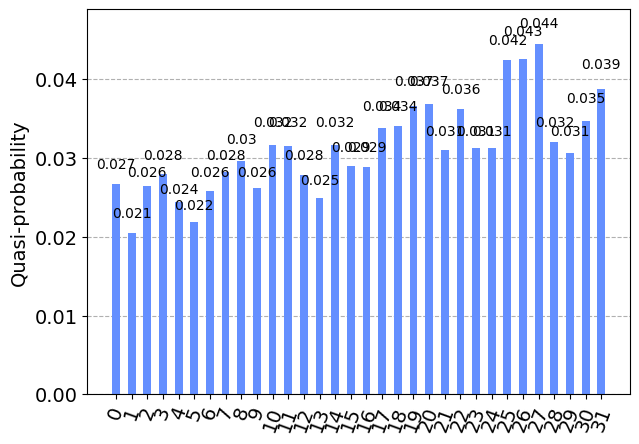

In [17]:
plot_histogram(result.quasi_dists)

## Podemos observar que os resultados não foram como o esperado. Isso provavelmente foi causado pelo numero de iterações pequena que rodamos na maquina quantica.